# **Importing Libaries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Data**

In [3]:
df = pd.read_csv("Ecommerce_User_Orders.csv")

# **Overview**

In [4]:
print("🔸 Shape:", df.shape)
print("🔸 Data Types:\n", df.dtypes)
print("🔸 Missing Values:\n", df.isnull().sum())
print("🔸 Duplicate Rows:", df.duplicated().sum())

🔸 Shape: (500, 9)
🔸 Data Types:
 order_id            object
user_id              int64
order_date          object
product_id          object
product_category    object
payment_method      object
order_amount         int64
city                object
device_type         object
dtype: object
🔸 Missing Values:
 order_id            0
user_id             0
order_date          0
product_id          0
product_category    0
payment_method      0
order_amount        0
city                0
device_type         0
dtype: int64
🔸 Duplicate Rows: 0


# **Drop duplicates**

In [5]:
df = df.drop_duplicates()

# **Convert order_date to datetime**

In [6]:
df['order_date'] = pd.to_datetime(df['order_date'])

# **New columns**

In [7]:
df['month'] = df['order_date'].dt.to_period('M')
df['day_of_week'] = df['order_date'].dt.day_name()

# **Order Volume by Month**

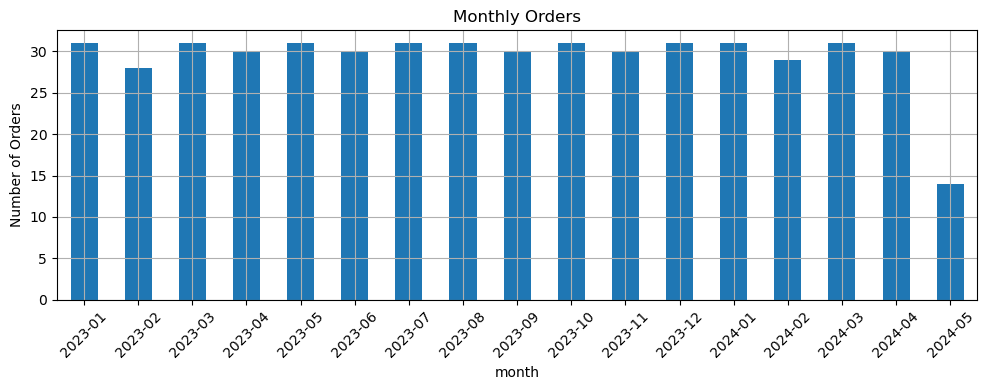

In [8]:
monthly_orders = df.groupby('month').size()
monthly_orders.plot(kind='bar', figsize=(10,4), title="Monthly Orders")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# **Popular Product Categories**

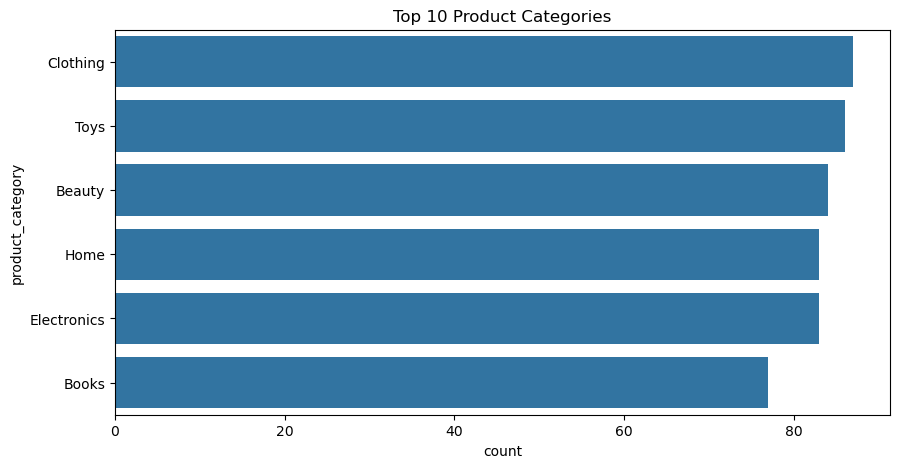

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(y='product_category', data=df, order=df['product_category'].value_counts().head(10).index)
plt.title("Top 10 Product Categories")
plt.show()

# **Payment Method Distribution**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13208\1598333328.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='payment_method', data=df, palette="Set2")


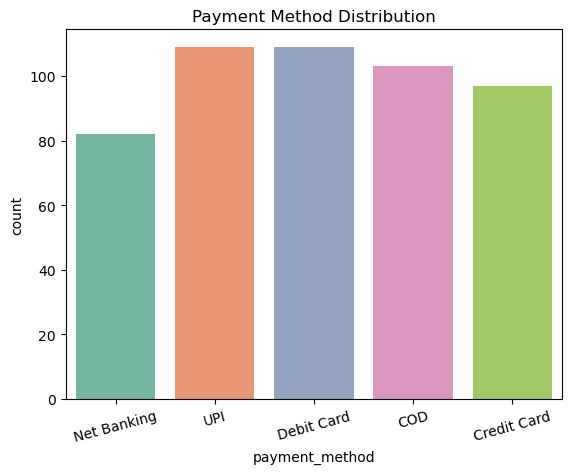

In [11]:
sns.countplot(x='payment_method', data=df, palette="Set2")
plt.title("Payment Method Distribution")
plt.xticks(rotation=15)
plt.show()

# **Revenue by City**

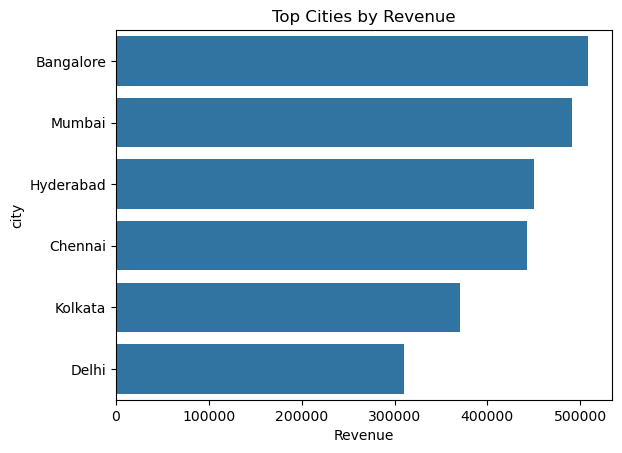

In [12]:
city_revenue = df.groupby('city')['order_amount'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=city_revenue.values, y=city_revenue.index)
plt.title("Top Cities by Revenue")
plt.xlabel("Revenue")
plt.show()


# **Orders by Device Type**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13208\930120791.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='device_type', data=df, palette="coolwarm")


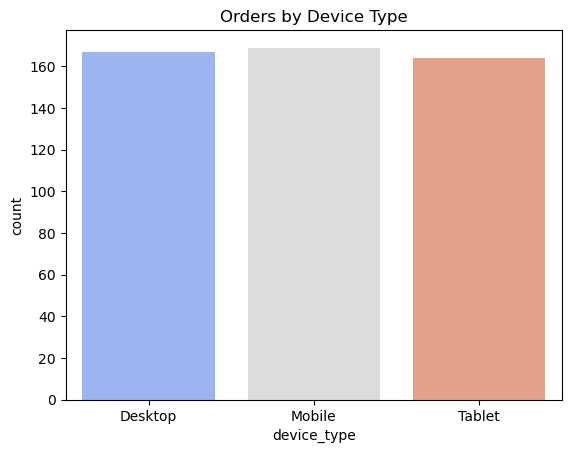

In [13]:
sns.countplot(x='device_type', data=df, palette="coolwarm")
plt.title("Orders by Device Type")
plt.show()


# **Order Amount Distribution**

plt.figure(figsize=(8,4))
sns.histplot(df['order_amount'], bins=40, kde=True)
plt.title("Order Amount Distribution")
plt.xlim(0, df['order_amount'].quantile(0.95))  # Remove outliers from plot
plt.show()


# **Weekly Ordering Patter**

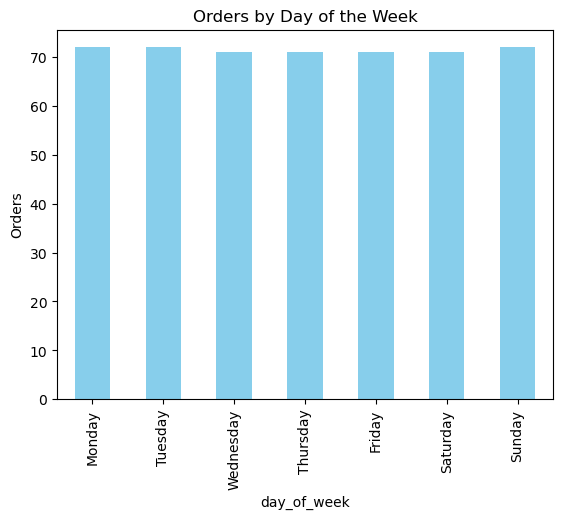

In [15]:
weekly_orders = df['day_of_week'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
weekly_orders.plot(kind='bar', title="Orders by Day of the Week", color='skyblue')
plt.ylabel("Orders")
plt.show()


# **Correlation**

In [16]:
print("\n📊 Correlation Between Numeric Fields:")
print(df[['order_amount']].corr())


📊 Correlation Between Numeric Fields:
              order_amount
order_amount           1.0
